In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
import datetime

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_excel('TimeSeriesDataDaukhi.xlsx')
df = pd.DataFrame(df)

In [ ]:
df.head(5)

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.6,NaN,10.9,8.0,3.5
1,2017-01-04,8.6,NaN,10.9,8.1,3.5
2,2017-01-05,8.6,NaN,10.5,8.1,3.6
3,2017-01-06,8.6,NaN,10.3,8.0,3.6
4,2017-01-09,8.6,NaN,10.4,8.1,3.7


In [ ]:
#Convert Date to datetime data and arrange 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')

In [ ]:
#tính giá trị trung bình mỗi cột
PCG=df['PCG'].mean(axis=0)
PLX=df['PLX'].mean(axis=0)
PVB=df['PVB'].mean(axis=0)
PVC=df['PVC'].mean(axis=0)
PVO=df['PVO'].mean(axis=0)

In [ ]:
#fill missing date 
groupby_day = df.groupby(pd.PeriodIndex(data=df.Date, freq='D'))
results = groupby_day.sum()
idx = pd.period_range(min(df.Date), max(df.Date))
df =results.reindex(idx, fill_value=0).rename_axis('Date').reset_index()
df

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.6,0.0,10.9,8.0,3.5
1,2017-01-04,8.6,0.0,10.9,8.1,3.5
2,2017-01-05,8.6,0.0,10.5,8.1,3.6
3,2017-01-06,8.6,0.0,10.3,8.0,3.6
4,2017-01-07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1819,2021-12-27,9.6,54.1,19.0,16.4,10.1
1820,2021-12-28,9.8,53.8,19.3,16.6,9.9
1821,2021-12-29,10.7,54.0,19.5,16.6,9.9
1822,2021-12-30,10.7,54.0,20.6,17.2,10.0


In [ ]:
#thay thể giá trị null bằng giá trị trung bình
df["PLX"]=df["PLX"].replace(0.0, PLX)
df["PCG"]=df["PCG"].replace(0.0, PCG)
df["PVB"]=df["PVB"].replace(0.0, PVB)
df["PVC"]=df["PVC"].replace(0.0, PVC)
df["PVO"]=df["PVO"].replace(0.0, PVO)
df

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.600000,58.268426,10.900000,8.000000,3.500000
1,2017-01-04,8.600000,58.268426,10.900000,8.100000,3.500000
2,2017-01-05,8.600000,58.268426,10.500000,8.100000,3.600000
3,2017-01-06,8.600000,58.268426,10.300000,8.000000,3.600000
4,2017-01-07,11.131629,58.268426,16.340176,8.022923,5.201917
...,...,...,...,...,...,...
1819,2021-12-27,9.600000,54.100000,19.000000,16.400000,10.100000
1820,2021-12-28,9.800000,53.800000,19.300000,16.600000,9.900000
1821,2021-12-29,10.700000,54.000000,19.500000,16.600000,9.900000
1822,2021-12-30,10.700000,54.000000,20.600000,17.200000,10.000000


In [ ]:
# Filter the data for a single stock code
#df = df[(df['code'] == 'PLX') | (df['code'] == 'PVC') | (df['code'] == 'PVB') | (df['code'] == 'PVO') | (df['code'] == 'PCG')] #PLX, PVC, PVB, PVO, PCG

In [ ]:
#df1 = df[(df['code'] == 'PLX')]

In [ ]:
#df2 = df[(df['code'] == 'PVC')]

In [ ]:
#df3 = df[(df['code'] == 'PVB')]

In [ ]:
#df4 = df[(df['code'] == 'PVO')]

In [ ]:
#df5 = df[(df['code'] == 'PCG')]

In [ ]:
# create date time features of a dataset
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [ ]:
df.to_excel(r'XuLyDaukhi.xlsx', index=False)

In [ ]:
df

,PCG,PLX,PVB,PVC,PVO,Year,Month,Day
Date,,,,,,,,
2017-01-03,8.600000,58.268426,10.900000,8.000000,3.500000,2017,1,3
2017-01-04,8.600000,58.268426,10.900000,8.100000,3.500000,2017,1,4
2017-01-05,8.600000,58.268426,10.500000,8.100000,3.600000,2017,1,5
2017-01-06,8.600000,58.268426,10.300000,8.000000,3.600000,2017,1,6
2017-01-07,11.131629,58.268426,16.340176,8.022923,5.201917,2017,1,7
...,...,...,...,...,...,...,...,...
2021-12-27,9.600000,54.100000,19.000000,16.400000,10.100000,2021,12,27
2021-12-28,9.800000,53.800000,19.300000,16.600000,9.900000,2021,12,28
2021-12-29,10.700000,54.000000,19.500000,16.600000,9.900000,2021,12,29


In [ ]:
#Set index
df.set_index('Date',inplace=True)

In [ ]:
pip install calplot

  Using cached calplot-0.1.7.5.tar.gz (132 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=43b82affebc73a2032892e7a8b49357b8067bcf9180b42505aed3572f0853538
  Stored in directory: /Users/haochile/Library/Caches/pip/wheels/eb/d8/9b/c0402d22680cb2c72cd1a2ae9cf7df772d68ea33d20c115289
Successfully built calplot
Note: you may need to restart the kernel to use updated packages.


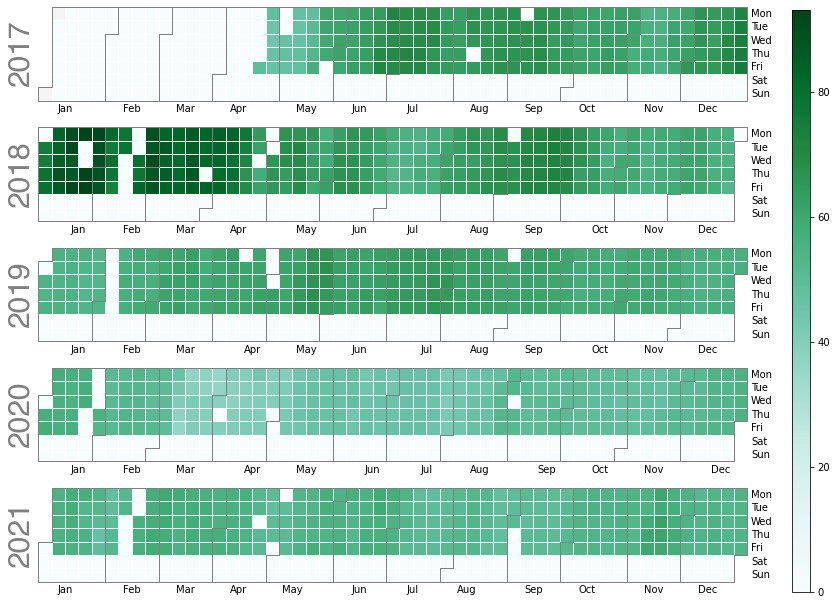

In [ ]:
#calender & heat map for each stock code
import calplot
calplot.calplot(df['PLX'], cmap="BuGn", colorbar=True);

<AxesSubplot:title={'center':'close'}, xlabel='code'>

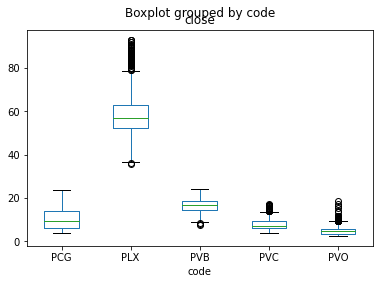

In [ ]:
#box plot
df.boxplot(by ='code', column =['close'], grid = False)

In [ ]:
#Xac dinh vi tri va gia tri cua Outilers
import numpy as np

def detect_outliers(series):
  """
    series: 1-D numpy array input
  """
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outlier_idxs = np.where(lower_compare | upper_compare)[0]
  return outlier_idxs

outlier_idxs=detect_outliers(df['PVB'])
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df.index[outlier_idxs].values)
print("Outlier values: ", df['PVB'][outlier_idxs])

Outlier indices:  [807 808 809]
Outlier months:  ['2020-03-30T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000']
Outlier values:  Date
2020-03-30    8.4
2020-03-31    7.6
2020-04-01    8.0
Name: PVB, dtype: float64


In [ ]:
df0 = pd.read_excel('XuLyDaukhixyz.xlsx')
df0 = pd.DataFrame(df0)
#Set index
df0.set_index('Date',inplace=True)

In [ ]:
df0

,PCG,PLX,PVB,PVC,PVO,Year,Month,Day
Date,,,,,,,,
2017-01-03,8.600000,NaN,10.900000,8.000000,3.500000,2017,1,3
2017-01-04,8.600000,NaN,10.900000,8.100000,3.500000,2017,1,4
2017-01-05,8.600000,NaN,10.500000,8.100000,3.600000,2017,1,5
2017-01-06,8.600000,NaN,10.300000,8.000000,3.600000,2017,1,6
2017-01-07,8.600000,NaN,10.333333,8.033333,3.633333,2017,1,7
2017-01-08,8.600000,NaN,10.366667,8.066667,3.666667,2017,1,8
2017-01-09,8.600000,NaN,10.400000,8.100000,3.700000,2017,1,9
2017-01-10,8.600000,NaN,10.800000,8.000000,3.500000,2017,1,10
2017-01-11,8.600000,NaN,10.600000,8.000000,3.600000,2017,1,11


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

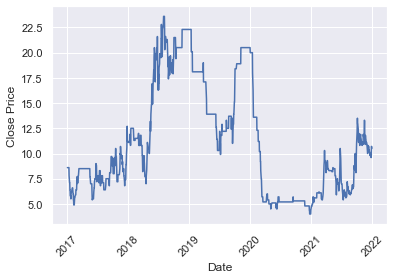

In [ ]:
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df0.index, df0['PCG'], )

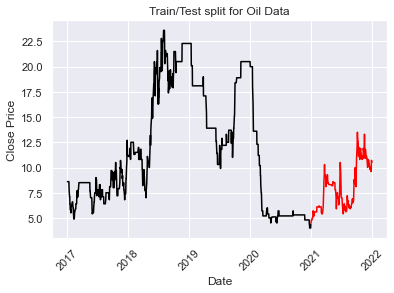

In [ ]:
train = df0[df0.index < pd.to_datetime("2021-1-01", format='%Y-%m-%d')]
test = df0[df0.index >= pd.to_datetime("2021-1-01", format='%Y-%m-%d')]

plt.plot(train['PCG'], color = "black")
plt.plot(test['PCG'], color = "red")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Oil Data")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

In [ ]:
y = train['PCG']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out1 = y_pred_df["Predictions"] 


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40769D-01    |proj g|=  6.37748D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.092D-05   4.408D-01
  F =  0.44075254690984561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


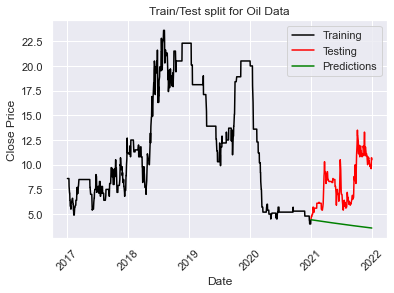

In [ ]:
plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Oil Data")
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["PCG"].values, y_pred_out1))
print("RMSE: ",arma_rmse)

RMSE:  4.701006692906583


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ARIMAmodel = ARIMA(y, order = (2, 1, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out2 = y_pred_df["Predictions"] 

/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


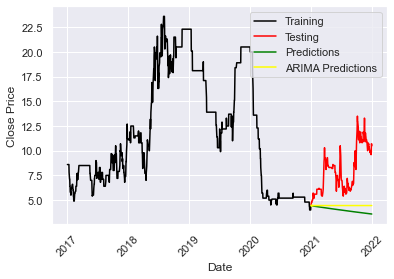

In [ ]:
plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

In [ ]:
arma_rmse = np.sqrt(mean_squared_error(test["PCG"].values, y_pred_out2 ))
print("ARIMA RMSE: ",arma_rmse)


ARIMA RMSE:  4.222755747303177


In [ ]:
SARIMAXmodel = SARIMAX(y, order = (2, 1, 1), seasonal_order=(0,0,0,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out3 = y_pred_df["Predictions"] 

/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41821D-01    |proj g|=  8.72910D-02

At iterate    5    f=  4.36766D-01    |proj g|=  1.46019D-03

At iterate   10    f=  4.35912D-01    |proj g|=  1.07723D-01

At iterate   15    f=  4.31594D-01    |proj g|=  5.44659D-03

At iterate   20    f=  4.31407D-01    |proj g|=  1.24696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     34      1     0     0   1.776D-05   4.314D-01
  F =  0.43140424441573660     

CONVERG

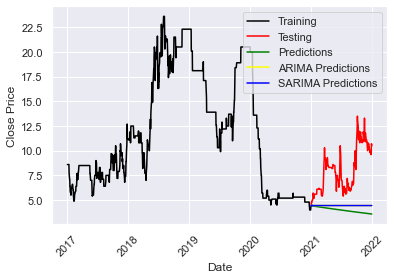

In [ ]:
plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out3, color='Blue', label = 'SARIMA Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

In [ ]:
arma_rmse = np.sqrt(mean_squared_error(test["PCG"].values, y_pred_out3))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  4.226389540418251


In [ ]:
train_size = int(len(df0) * 0.50)
train, test = df0[0:train_size], df0[train_size:]

In [ ]:
# statistical test for the stationarity of the time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
# create a differenced time series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
  return Series(diff)

#load dataset
# difference data
stationary = difference(df0['PCG'])
stationary.index = df0['PCG'].index[1:]
# check if stationary
result = adfuller(stationary) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # save
stationary.to_csv('stationary.csv', header=False)

#loai gia thuyet 0

ADF Statistic: -16.051539
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


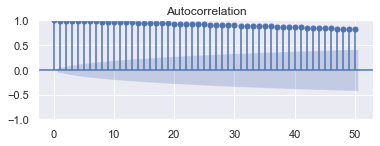

In [ ]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

#d => d=???
pyplot.figure()
pyplot.subplot(211)
plot_acf(df0['PCG'], lags=50, ax=pyplot.gca())

pyplot.show()

/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


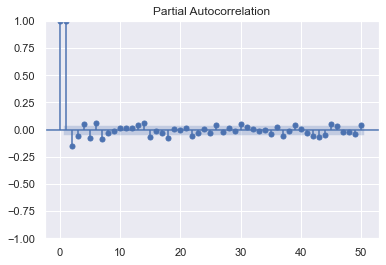

In [ ]:
#p => p=2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df0['PCG'], lags =50)
plt.show()


In [ ]:
#kiem tra tinh dung (stationarity)
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [ ]:
check_stationarity(train['PCG'])
#check_stationarity(train['PLX'])
check_stationarity(train['PVB']) 
check_stationarity(train['PVC'])
check_stationarity(train['PVO'])

The series is NOT stationary
The series is NOT stationary
The series is NOT stationary
The series is stationary


The series is stationary


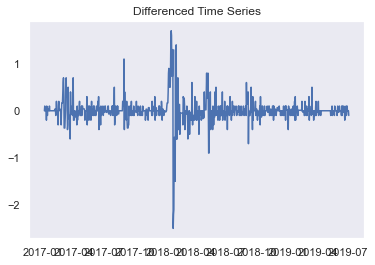

In [ ]:
#transform de duoc tinh dung
ts_diff = train['PVO'].diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)

plt.plot(ts_diff)
plt.title('Differenced Time Series')
plt.grid()
plt.show()

In [ ]:
#Tim tham so tu dong cho ARIMA Models
import pmdarima as pm
stepwise_model = pm.auto_arima(ts_diff,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train['PCG'])

/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return n

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
# evaluate ARIMA model

# walk-forward validation
train_size = int(len(df0) * 0.50)
train, test = df0[0:train_size], df0[train_size:]

history = [x for x in train['PCG']]
predictions = list()
for i in range(len(test['PCG'])):
    # predict
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test['PCG'][i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


>Predicted=11.256, Expected=12.200
>Predicted=12.238, Expected=11.000
>Predicted=11.004, Expected=11.000
>Predicted=10.845, Expected=11.000
>Predicted=11.132, Expected=11.000
>Predicted=10.887, Expected=9.900
>Predicted=9.912, Expected=10.800
>Predicted=10.713, Expected=11.800
>Predicted=12.058, Expected=11.800
>Predicted=11.702, Expected=11.800
>Predicted=11.885, Expected=11.800
>Predicted=11.727, Expected=11.800
>Predicted=11.863, Expected=11.800
>Predicted=11.746, Expected=11.800
>Predicted=11.847, Expected=12.900
>Predicted=12.939, Expected=12.200
>Predicted=12.248, Expected=12.200
>Predicted=12.076, Expected=12.200
>Predicted=12.310, Expected=12.200
>Predicted=12.102, Expected=12.200
>Predicted=12.287, Expected=12.200
>Predicted=12.123, Expected=12.200
>Predicted=12.268, Expected=12.200
>Predicted=12.140, Expected=12.200
>Predicted=12.253, Expected=12.200
>Predicted=12.153, Expected=12.200
>Predicted=12.241, Expected=12.200
>Predicted=12.164, Expected=12.200
>Predicted=12.232, Exp

>Predicted=11.140, Expected=11.200
>Predicted=11.252, Expected=11.200
>Predicted=11.155, Expected=11.200
>Predicted=11.239, Expected=10.200
>Predicted=10.076, Expected=10.200
>Predicted=10.173, Expected=10.200
>Predicted=10.223, Expected=10.200
>Predicted=10.180, Expected=10.200
>Predicted=10.217, Expected=10.200
>Predicted=10.186, Expected=9.200
>Predicted=9.122, Expected=9.200
>Predicted=9.133, Expected=8.300
>Predicted=8.278, Expected=8.033
>Predicted=7.907, Expected=7.767
>Predicted=7.813, Expected=7.500
>Predicted=7.400, Expected=7.500
>Predicted=7.548, Expected=6.800
>Predicted=6.696, Expected=6.200
>Predicted=6.137, Expected=5.700
>Predicted=5.624, Expected=5.700
>Predicted=5.694, Expected=5.700
>Predicted=5.705, Expected=5.700
>Predicted=5.696, Expected=5.700
>Predicted=5.703, Expected=5.700
>Predicted=5.697, Expected=5.200
>Predicted=5.155, Expected=5.200
>Predicted=5.168, Expected=5.200
>Predicted=5.226, Expected=5.200
>Predicted=5.178, Expected=5.200
>Predicted=5.218, Expect

>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=5.300
>Predicted=5.300, Expected=4.800
>Predicted=4.754, Expected=4.800
>Predicted=4.771, Expected=4.800
>Predicted

>Predicted=6.989, Expected=7.000
>Predicted=7.009, Expected=6.900
>Predicted=6.882, Expected=6.500
>Predicted=6.457, Expected=6.300
>Predicted=6.254, Expected=6.100
>Predicted=6.086, Expected=5.900
>Predicted=5.860, Expected=5.700
>Predicted=5.681, Expected=5.500


/Users/haochile/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=5.464, Expected=5.400
>Predicted=5.389, Expected=5.500
>Predicted=5.505, Expected=5.800
>Predicted=5.844, Expected=6.300
>Predicted=6.364, Expected=6.333
>Predicted=6.360, Expected=6.367
>Predicted=6.354, Expected=6.400
>Predicted=6.419, Expected=6.300
>Predicted=6.278, Expected=5.800
>Predicted=5.748, Expected=6.200
>Predicted=6.211, Expected=6.000
>Predicted=6.030, Expected=5.933
>Predicted=5.872, Expected=5.867
>Predicted=5.900, Expected=5.800
>Predicted=5.755, Expected=5.900
>Predicted=5.937, Expected=5.800
>Predicted=5.774, Expected=5.600
>Predicted=5.585, Expected=5.700
>Predicted=5.693, Expected=5.700
>Predicted=5.721, Expected=5.700
>Predicted=5.683, Expected=5.700
>Predicted=5.714, Expected=5.800
>Predicted=5.799, Expected=6.300
>Predicted=6.370, Expected=6.800
>Predicted=6.872, Expected=7.200
>Predicted=7.260, Expected=7.000
>Predicted=6.990, Expected=6.800
>Predicted=6.757, Expected=6.600
>Predicted=6.583, Expected=6.700
>Predicted=6.694, Expected=6.600
>Predicted

In [ ]:
from math import sqrt
#report performance
rmse = sqrt(mean_squared_error(test['PCG'], predictions)) 
print('RMSE: %.3f' % rmse)

RMSE: 0.296


In [ ]:
from pandas import DataFrame
#Residual Errors
# errors
residuals = [test['PCG'][i]-predictions[i] for i in range(len(test['PCG']))]
residuals = DataFrame(residuals)

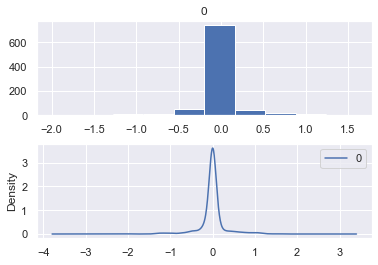

In [ ]:
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca()) 
pyplot.subplot(212) 
residuals.plot(kind='kde', ax=pyplot.gca()) 
pyplot.show()